1.  To predict the medical insurance cost of a patient from an insurance company - Regression Problem
2.  ML Model - Linear Regression Model (Supervised ML)
3.  Work Flow

    *   Collect Insurance Cost Data - Kaggle Dataset
    *   Data Analysis
    *   Data Pre-Processing
    *   Train-Test Split
    *   Machine Learning Training - Linear Regression Model (Supervised ML)
    *   Develop Prediction System - Feed new data to the trained model to predict the cost of a medical insurance of a patient

Import the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Pre-Processing

In [ ]:
insurance_data = pd.read_csv('/content/insurance.csv')

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

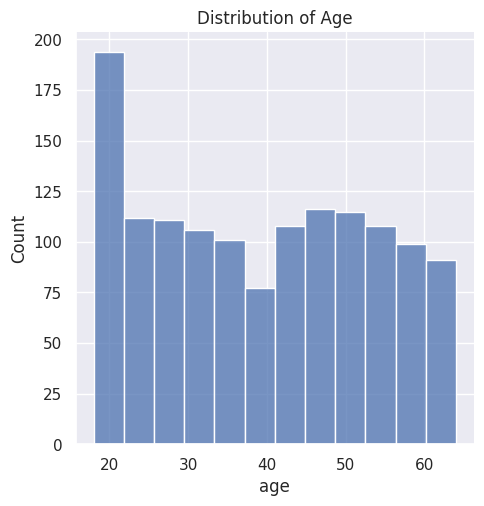

In [ ]:
# distribution of age value

sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.title('Distribution of Age')
plt.show()

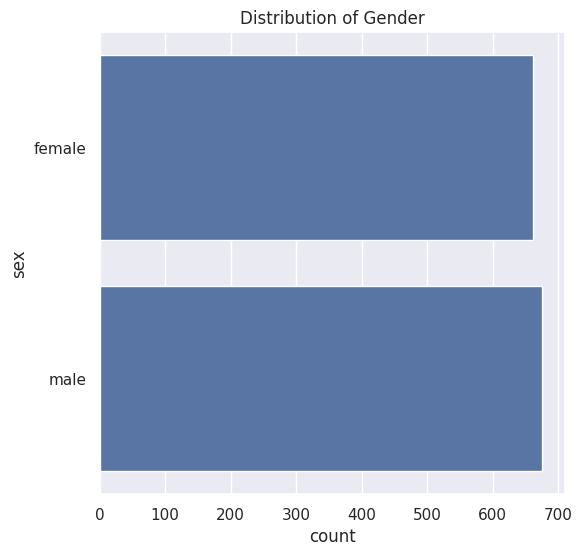

In [ ]:
# distribution of gender value

plt.figure(figsize=(6,6))
sns.countplot(insurance_data['sex']) # == sns.countplot(x='sex', data=insurance_data)
plt.title('Distribution of Gender')
plt.show()

In [ ]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

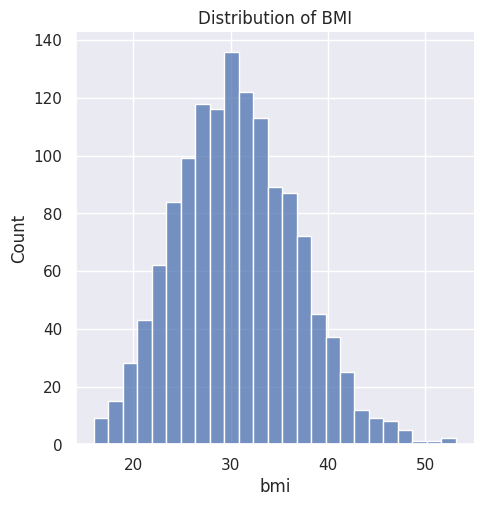

In [ ]:
# distribution of bmi value

plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.title('Distribution of BMI')
plt.show()

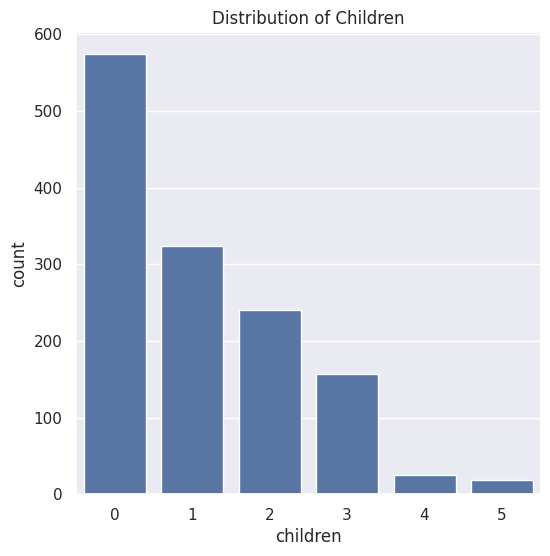

In [ ]:
# distribution of children value

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Distribution of Children')
plt.show()

In [ ]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


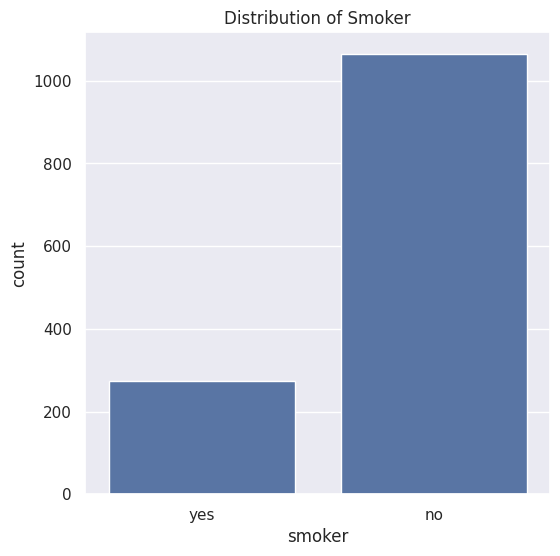

In [ ]:
# distribution of smoker value

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Distribution of Smoker')
plt.show()

In [ ]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


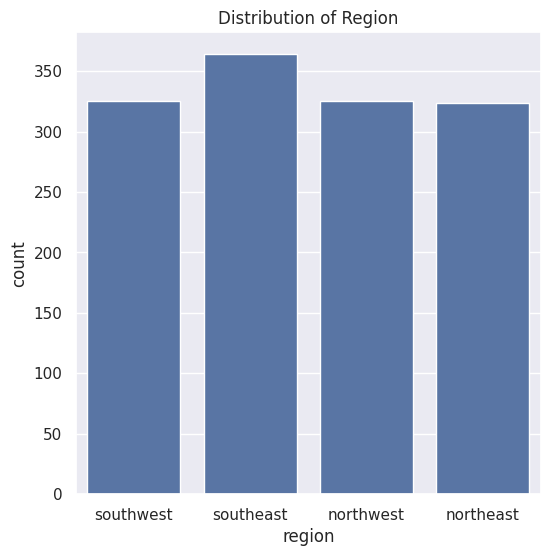

In [ ]:
# distribution of region value

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Distribution of Region')
plt.show()

In [ ]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

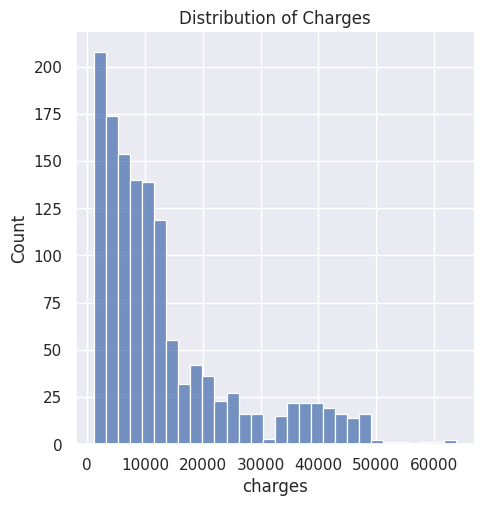

In [ ]:
# distribution of charges value

plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'])
plt.title('Distribution of Charges')
plt.show()

Data Pre-Processing - Continuation

In [ ]:
# Label Encoding

insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
insurance_data.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

<ipython-input-32-5529366aad08>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)


In [ ]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train-Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Machine Learning Training - Linear Regression Model

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# accuracy on training data

train_data_prediction = model.predict(X_train)
train_data_accuracy = metrics.r2_score(Y_train, train_data_prediction)
print('Training data accuracy = ', train_data_accuracy)

Training data accuracy =  0.7518195459072954


In [ ]:
# accuracy on test data

test_data_prediction = model.predict(X_test)
test_data_accuracy = metrics.r2_score(Y_test, test_data_prediction)
print('Test data accuracy = ', test_data_accuracy)

Test data accuracy =  0.7454471618659976


Predictive System

In [ ]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data) # change tuple to numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('The insurance cost is $', prediction[0])

The insurance cost is $ 3632.0204329083863


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
